In [24]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.utils import np_utils

import matplotlib.pyplot as plt
from random import shuffle
import tensorflow as tf
import numpy as np
import cv2 as cv
import os

In [2]:
dataPath = 'Chestimages'
Categories = os.listdir(dataPath)
labels = [i for i in range (len(Categories))]
labeldict = {}

for i in range (len(Categories)):
    labeldict[Categories[i]]=labels[i]

print(Categories)
print(labels)
print(labeldict)  

['NORMAL', 'PNEUMONIA']
[0, 1]
{'NORMAL': 0, 'PNEUMONIA': 1}


In [3]:
imageSize=128
Dataset=[]

for Category in Categories:
    folderPath = os.path.join(dataPath,Category)
    imageNames = os.listdir(folderPath)

    ##print(folderPath)
    ##print(imageNames)
    print(Category)
    
    for imageName in imageNames:
        imagePath = os.path.join(folderPath,imageName)
        image = cv.imread(imagePath)
        
        try:
            grayImage = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
            resized = cv.resize(grayImage,(imageSize,imageSize))
            Dataset.append([resized,labeldict[Category]])
            
        except Exception as e:
            print(e)

#print(Dataset)


NORMAL
PNEUMONIA


In [4]:
shuffle(Dataset)

In [5]:
data = []
target = []

for feature, label in Dataset:
    
    data.append(feature)
    target.append(label)


#print(data)
#print(target)

In [6]:
data = np.array(data)/255
print(data.shape)
data = np.reshape(data,(data.shape[0],imageSize,imageSize,1))
target = np.array(target)
#print(target)
#print(data.shape)
print(data.shape)
print(target.shape)

newTarget = np_utils.to_categorical(target)

(5216, 128, 128)
(5216, 128, 128, 1)
(5216,)


In [7]:
np.save('dataChestXray',data)
np.save('targetChestXray',newTarget)

In [8]:
data = np.load('dataChestXray.npy')
target = np.load('targetChestXray.npy')
print(data.shape[1:])

(128, 128, 1)


In [9]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 activation (Activation)     (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 61, 61, 32)        0         
                                                        

In [10]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size = 0.2)

history = model.fit(
    train_data, 
    train_target, 
    epochs = 12, 
    validation_data = (test_data, test_target)
)

Epoch 1/12
131/131 [==============================] - 35s 260ms/step - loss: 0.4692 - accuracy: 0.7864 - val_loss: 0.4194 - val_accuracy: 0.9291
Epoch 2/12
131/131 [==============================] - 34s 256ms/step - loss: 0.2301 - accuracy: 0.9044 - val_loss: 0.2777 - val_accuracy: 0.9416
Epoch 3/12
131/131 [==============================] - 34s 258ms/step - loss: 0.1818 - accuracy: 0.9307 - val_loss: 0.2332 - val_accuracy: 0.9473
Epoch 4/12
131/131 [==============================] - 34s 257ms/step - loss: 0.1628 - accuracy: 0.9372 - val_loss: 0.1567 - val_accuracy: 0.9531
Epoch 5/12
131/131 [==============================] - 34s 256ms/step - loss: 0.1430 - accuracy: 0.9489 - val_loss: 0.1583 - val_accuracy: 0.9464
Epoch 6/12
131/131 [==============================] - 34s 258ms/step - loss: 0.1294 - accuracy: 0.9518 - val_loss: 0.1561 - val_accuracy: 0.9607
Epoch 7/12
131/131 [==============================] - 34s 256ms/step - loss: 0.1171 - accuracy: 0.9559 - val_loss: 0.1661 - val_ac

In [11]:
model.evaluate(test_data,test_target)

33/33 [==============================] - 1s 44ms/step - loss: 0.0888 - accuracy: 0.9722


[0.0888151153922081, 0.9722222089767456]

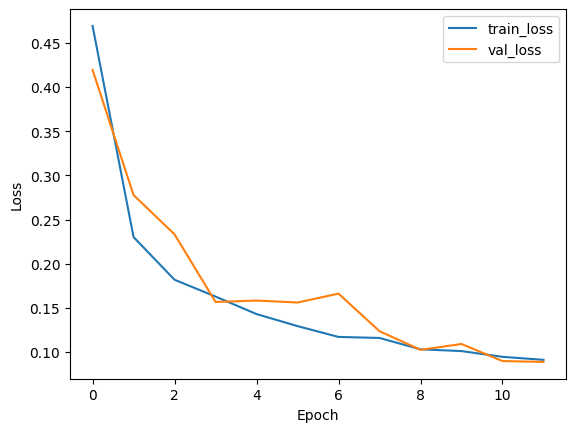

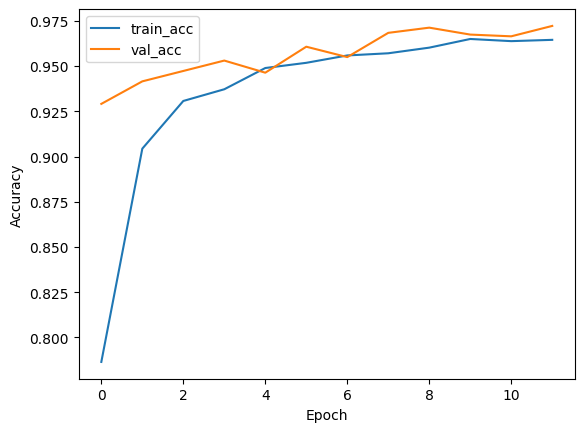

In [23]:
#  Obtenemos los valores de loss y accuracy para los datos de entrenamiento y validación
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Graficamos la evolución del loss
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Graficamos la evolución del accuracy
plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
model.save('chest_xray.h5')


In [25]:
model = load_model('chest_xray.h5')

In [26]:
image = cv.imread('NORMAL.jpeg')
grayImage = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
resized = cv.resize(grayImage,(128,128))
normalized = resized/255
reshaped = np.reshape(normalized,(1,128,128,1))
result = model.predict(reshaped)
print(result)


1/1 [==============================] - 0s 150ms/step
[[0.02543493 0.9745651 ]]
